# Defense model based on high performance CNN model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
plt.style.use(['classic', 'seaborn-deep', 'seaborn-dark'])
sns.set(style='whitegrid')

## Load Original CNN Model Result

In [2]:
with open('json/baseline_acc.json') as f:
    baseline_acc = json.loads(f.read())

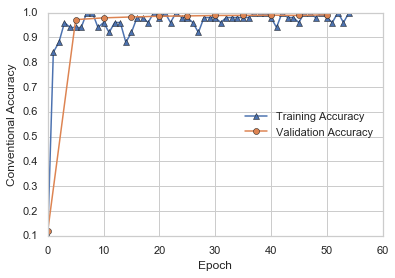

In [3]:
plt.figure(figsize=(6, 4))
x = np.arange(0, 55, 1)
x_v = np.arange(0, 55, 5)
plt.plot(x, 
         baseline_acc['train_acc'],
         marker='^',
        label = 'Training Accuracy')
plt.plot(x_v, 
         baseline_acc['validation_acc'],
        marker='o',
        label = 'Validation Accuracy')


plt.ylabel('Conventional Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=5)
plt.savefig('plots/orig_acc')
plt.show()

In [4]:
baseline_acc['acc_buffer']

0.9917

### Evaluation on test set

In [5]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import os
import tensorflow as tf
import tensorflow.contrib.slim as slim
from tensorflow.examples.tutorials.mnist import input_data

import mnist_data
import cnn_model

MODEL_DIRECTORY = "model/model.ckpt"

PIXEL_DEPTH = 255
mnist = input_data.read_data_sets('data/', one_hot=True)

is_training = tf.placeholder(tf.bool, name='MODE')

# tf Graph input
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])  # answer
y = cnn_model.CNN(x, is_training=is_training)

# Add ops to save and restore all the variables
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer(), feed_dict={is_training: True})

# Restore variables from disk
saver = tf.train.Saver()

saver.restore(sess, MODEL_DIRECTORY)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
INFO:tensorflow:Restoring parameters from model/model.ckpt


In [6]:
batch_size = 5000

# Calculate accuracy for all mnist test images
test_size = mnist.test.num_examples
total_batch = int(test_size / batch_size)
acc_buffer = []
# Loop over all batches
for i in range(total_batch):

    batch = mnist.test.next_batch(batch_size)
    batch_xs = (batch[0] - (PIXEL_DEPTH / 2.0) / PIXEL_DEPTH)  # make zero-centered distribution as in mnist_data.extract_data()
    batch_ys = batch[1]

    y_final = sess.run(y, feed_dict={x: batch_xs, y_: batch_ys, is_training: False})

    correct_prediction = np.equal(np.argmax(y_final, 1), np.argmax(batch_ys, 1))

    acc_buffer.append(np.sum(correct_prediction) / batch_size)

print("test accuracy for the original model: %g" % np.mean(acc_buffer))

test accuracy for the original model: 0.9941


## Load Robust Model Result

In [8]:
import pickle
# with (open("output/bi_acc.p", "rb")) as openfile:
#     bi_acc = pickle.load(openfile)

with open('json/train_acc.p', 'rb') as fp:
    robust_train_acc = pickle.load(fp)
    
with open('json/validation_acc.p', 'rb') as fp:
    robust_val_acc = pickle.load(fp)

with open('json/acc_buffer.p', 'rb') as fp:
    robust_acc_buffer = pickle.load(fp)



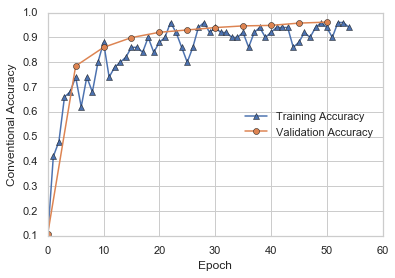

In [10]:

plt.figure(figsize=(6, 4))
x = np.arange(0, 55, 1)
x_v = np.arange(0, 55, 5)
plt.plot(x, 
         robust_train_acc,
         marker='^',
         label = 'Training Accuracy'
        )
plt.plot(x_v, 
         robust_val_acc,
        label = 'Validation Accuracy',
         marker='o')

plt.ylabel('Conventional Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=5)
plt.savefig('plots/robust_acc')
plt.show()

## Evaluation on test data

In [12]:
MODEL_DIRECTORY = "robust_model/model.ckpt"

PIXEL_DEPTH = 255
mnist = input_data.read_data_sets('data/', one_hot=True)

is_training = tf.placeholder(tf.bool, name='MODE')

# tf Graph input
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])  # answer
y = cnn_model.CNN(x, is_training=is_training)

# Add ops to save and restore all the variables
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer(), feed_dict={is_training: True})

# Restore variables from disk
saver = tf.train.Saver()



saver.restore(sess, MODEL_DIRECTORY)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
INFO:tensorflow:Restoring parameters from robust_model/model.ckpt


In [27]:
batch_size = 5000

# Calculate accuracy for all mnist test images
test_size = mnist.test.num_examples
total_batch = int(test_size / batch_size)
acc_buffer = []
# Loop over all batches
for i in range(total_batch):

    batch = mnist.test.next_batch(batch_size)
    batch_xs = (batch[0] - (PIXEL_DEPTH / 2.0) / PIXEL_DEPTH)  # make zero-centered distribution as in mnist_data.extract_data()
    batch_ys = batch[1]

    y_final = sess.run(y, feed_dict={x: batch_xs, y_: batch_ys, is_training: False})

    correct_prediction = np.equal(np.argmax(y_final, 1), np.argmax(batch_ys, 1))

    acc_buffer.append(np.sum(correct_prediction) / batch_size)

print("test accuracy for the robust model: %g" % np.mean(acc_buffer))
    

test accuracy for the robust model: 0.9678
